In [ ]:
# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

In [ ]:
#upload data to colab
from google.colab import files
uploaded = files.upload()

Saving Wage.csv to Wage.csv


In [ ]:
data = pd.read_csv('Wage.csv')

In [ ]:
data.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3000 non-null   int64  
 1   year        3000 non-null   int64  
 2   age         3000 non-null   int64  
 3   sex         3000 non-null   object 
 4   maritl      3000 non-null   object 
 5   race        3000 non-null   object 
 6   education   3000 non-null   object 
 7   region      3000 non-null   object 
 8   jobclass    3000 non-null   object 
 9   health      3000 non-null   object 
 10  health_ins  3000 non-null   object 
 11  logwage     3000 non-null   float64
 12  wage        3000 non-null   float64
dtypes: float64(2), int64(3), object(8)
memory usage: 304.8+ KB


Our focus in this analysis is on the relationship between `age` and`wage`. in the following section these variables are depicted.

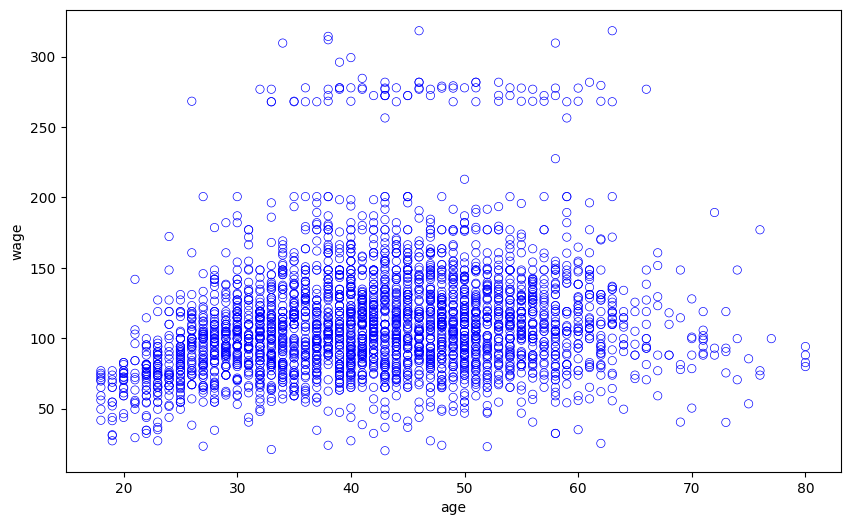

In [ ]:
fig = plt.figure(figsize=(10,6))
fig = sns.scatterplot(x='age', y='wage', data=data, facecolor='none', edgecolor='blue')


As we can see, the relationship between these variables is not linear. Therefore, polynomial regression may provide a better model. Additionally, to determine the best degree for the polynomial, we will use cross-validation to find the optimal degree.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


# split data to train and test
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data['age'], data['wage'], test_size=0.30, random_state=42)

In [ ]:
# fit a polynomial regression
degree = [2,3,4,5,10]
k = 5

R_squared_mean = np.zeros(len(degree))
mse_mean = np.zeros(len(degree))

for i in range(len(degree)):
  d = degree[i]
  print('d:', d)
  R_squared0 = 0
  mse0 = 0

  for train_index, test_index  in KFold(n_splits = k, shuffle=True, random_state=42).split(x_train):
         X_train, X_val = x_train.iloc[train_index], x_train.iloc[test_index]
         Y_train, Y_val = y_train.iloc[train_index], y_train.iloc[test_index]

         poly_reg = np.poly1d(np.polyfit(X_train, Y_train, d))
         y_pred_poly = poly_reg(X_val)
         R_squared = r2_score(Y_val, y_pred_poly)
         mse = mean_squared_error(Y_val, y_pred_poly)
         R_squared0 += R_squared
         mse0 += mse

  R_squared_mean[i] = R_squared0/k
  mse_mean[i] = mse0/k
  print('R_squared_mean:', R_squared_mean[i])
  print('mse_mean:', mse_mean[i])
  print()

d: 2
R_squared_mean: 0.07234814998831593
mse_mean: 1651.2224055526694

d: 3
R_squared_mean: 0.07609634301254534
mse_mean: 1644.763341007391

d: 4
R_squared_mean: 0.07456371269657254
mse_mean: 1647.1231291050906

d: 5
R_squared_mean: 0.07300608001431148
mse_mean: 1649.7736176345945

d: 10
R_squared_mean: 0.04239091988713643
mse_mean: 1699.3301133376385



As we can see the least MSE is associated with 3 degree polynomial regression model. To better understand differences between various degrees, all degrees that were used in CV will be depicted.

In [ ]:
# fit different plynomial regression to data
poly_reg1 = np.poly1d(np.polyfit(x_train, y_train, 2))
poly_reg2 = np.poly1d(np.polyfit(x_train, y_train, 3))
poly_reg3 = np.poly1d(np.polyfit(x_train, y_train, 4))
poly_reg4 = np.poly1d(np.polyfit(x_train, y_train, 5))
poly_reg5 = np.poly1d(np.polyfit(x_train, y_train, 10))

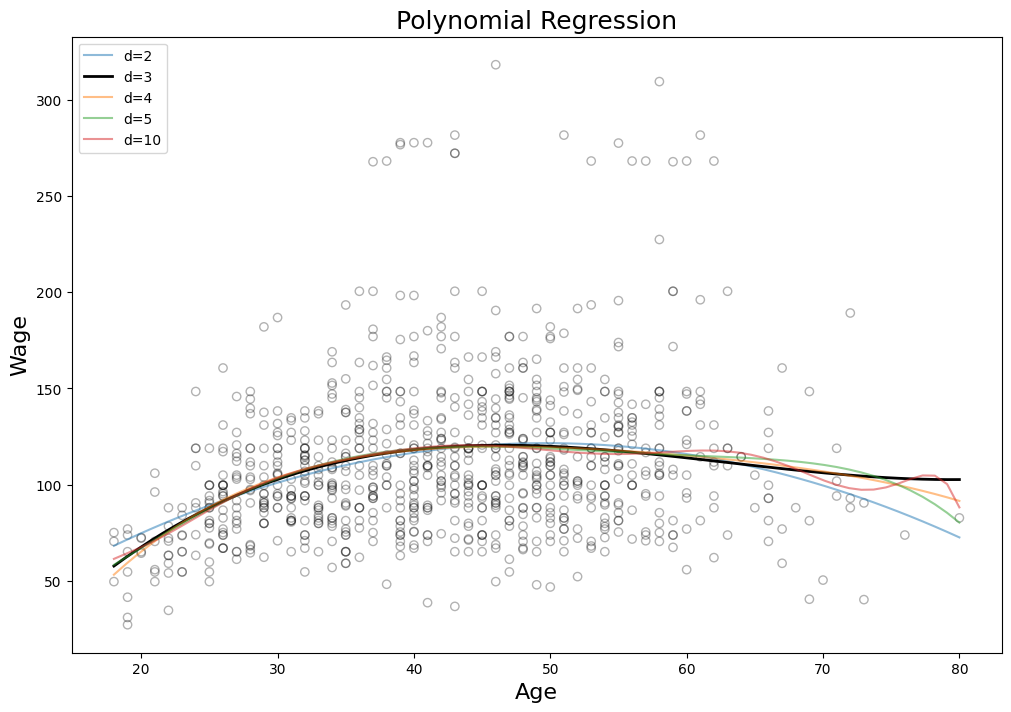

In [ ]:
# plot the polynomial line along with test data
size = plt.figure(figsize = (12,8))
# We will plot the graph for 70 observations only
xp = np.linspace(x_test.min(),x_test.max(), 70)
# prediction of polynomials
pred_plot1 = poly_reg1(xp)
pred_plot2 = poly_reg2(xp)
pred_plot3 = poly_reg3(xp)
pred_plot4 = poly_reg4(xp)
pred_plot5 = poly_reg5(xp)
# visualize all polynomail regression lines
scatter = plt.scatter(x_test, y_test, facecolor='None', edgecolor='k', alpha=0.3)
_ = plt.xlabel('Age', fontsize=16)
_ = plt.ylabel('Wage', fontsize=16)
_ = plt.plot(xp, pred_plot1, label='d=2', alpha= 0.5)
_ = plt.plot(xp, pred_plot2, 'k',label='d=3', linewidth=2)
_ = plt.plot(xp, pred_plot3, label='d=4', alpha= 0.5)
_ = plt.plot(xp, pred_plot4, label='d=5', alpha= 0.5)
_ = plt.plot(xp, pred_plot5, label='d=10', alpha= 0.5)
_ = plt.legend(loc='upper left')
_ = plt.title('Polynomial Regression', fontsize=18)
_ = plt.show()

*Section 2*

In this part we are going to project a step function on the data. So firstly, we should find the optimal number of cuts using cross validation.

In [ ]:
import statsmodels.api as sm

n_cut = [3, 5, 7, 10, 15, 20, 30]
k = 5

R_squared_mean = np.zeros(len(n_cut))
mse_mean = np.zeros(len(n_cut))

for i in range(len(n_cut)):
  n = n_cut[i]
  print('n:', n)
  R_squared0 = 0
  mse0 = 0

  for train_index, test_index  in KFold(n_splits = k, shuffle=True, random_state=42).split(x_train):
         X_train, X_val = x_train.iloc[train_index], x_train.iloc[test_index]
         Y_train, Y_val = y_train.iloc[train_index], y_train.iloc[test_index]

         df_cut, bins = pd.cut(X_train, n, retbins=True)
         bins[0] -= 0.1
         bins[-1] += 0.1

         df_steps = pd.concat([X_train, df_cut, Y_train], keys=['age', 'age_cuts', 'wage'], axis=1)
         df_steps_dummies = pd.get_dummies(df_cut)

         #model = SMWrapper(sm.GLM)
         model = sm.GLM(df_steps.wage, df_steps_dummies).fit()

         #binning test set into same bins
         #bin_mapping = np.digitize(X_val, bins)
         bin_mapping = pd.cut(X_val, bins=bins, include_lowest=True)
         X_validation = pd.get_dummies(bin_mapping)

         #X_validation = X_validation.reindex(columns=df_steps_dummies.columns, fill_value=0)

         # validate model on test data
         predicts = model.predict(X_validation)
         R_squared = r2_score(Y_val, predicts)
         mse = mean_squared_error(Y_val, predicts)
         R_squared0 += R_squared
         mse0 += mse

  mse_mean[i] = mse0/k
  R_squared_mean[i] = R_squared0/k
  print('R_squared_mean:', R_squared_mean[i])
  print('mse_mean:', mse_mean[i])
  print()

n: 3
R_squared_mean: 0.024259058158604276
mse_mean: 1738.257595408601

n: 5
R_squared_mean: 0.05136516523076358
mse_mean: 1686.7942656884734

n: 7
R_squared_mean: 0.05629815073294715
mse_mean: 1679.041280492267

n: 10
R_squared_mean: 0.06100086281106405
mse_mean: 1670.8552083058635

n: 15
R_squared_mean: 0.06169336719713063
mse_mean: 1668.7998130151154

n: 20
R_squared_mean: 0.05574730467945126
mse_mean: 1679.353542498627

n: 30
R_squared_mean: 0.051730807367917
mse_mean: 1687.1050932918238



Considering both R-squared and MSE metrics, 10 cuts appear to be the optimal number. Although 15 cuts have shown slightly better results, the difference between them is negligible. Now we can build the model using 10 cuts and visualize it.

In [ ]:
# build bins to project a stepwise model
df_cut, bins = pd.cut(x_train, 10, retbins=True)
df_cut

611     (24.2, 30.4]
530     (24.2, 30.4]
2787    (30.4, 36.6]
49      (30.4, 36.6]
1883    (49.0, 55.2]
            ...     
1638    (49.0, 55.2]
1095    (55.2, 61.4]
1130    (24.2, 30.4]
1294    (49.0, 55.2]
860     (55.2, 61.4]
Name: age, Length: 2100, dtype: category
Categories (10, interval[float64, right]): [(17.938, 24.2] < (24.2, 30.4] < (30.4, 36.6] <
                                            (36.6, 42.8] ... (55.2, 61.4] < (61.4, 67.6] <
                                            (67.6, 73.8] < (73.8, 80.0]]

In [ ]:
bins[0] -= 0.1
bins[-1] += 0.1
bins

array([17.838, 24.2  , 30.4  , 36.6  , 42.8  , 49.   , 55.2  , 61.4  ,
       67.6  , 73.8  , 80.1  ])

In [ ]:
df_cut.value_counts(sort=False)

age
(17.938, 24.2]    130
(24.2, 30.4]      232
(30.4, 36.6]      306
(36.6, 42.8]      395
(42.8, 49.0]      445
(49.0, 55.2]      303
(55.2, 61.4]      192
(61.4, 67.6]       68
(67.6, 73.8]       18
(73.8, 80.0]       11
Name: count, dtype: int64

In [ ]:
df_steps = pd.concat([x_train, df_cut, y_train], keys=['age', 'age_cuts', 'wage'], axis=1)
df_steps_dummies = pd.get_dummies(df_cut)
df_steps_dummies.head()

,"(17.938, 24.2]","(24.2, 30.4]","(30.4, 36.6]","(36.6, 42.8]","(42.8, 49.0]","(49.0, 55.2]","(55.2, 61.4]","(61.4, 67.6]","(67.6, 73.8]","(73.8, 80.0]"
611,False,True,False,False,False,False,False,False,False,False
530,False,True,False,False,False,False,False,False,False,False
2787,False,False,True,False,False,False,False,False,False,False
49,False,False,True,False,False,False,False,False,False,False
1883,False,False,False,False,False,True,False,False,False,False


In [ ]:
import statsmodels.api as sm

model = sm.GLM(df_steps['wage'], df_steps_dummies).fit()

#binning test set into same bins
bin_mapping = np.digitize(x_test, bins)
X_validation = pd.get_dummies(bin_mapping)

In [ ]:
# validate model on test data
predicts = model.predict(X_validation)

#print('R_squared:', model.rsquared)
print('mse:', mean_squared_error(y_test, predicts))

mse: 1494.6656500882295


In [ ]:
model.params

(17.938, 24.2]     73.924449
(24.2, 30.4]       97.298365
(30.4, 36.6]      110.752879
(36.6, 42.8]      117.006784
(42.8, 49.0]      121.044858
(49.0, 55.2]      116.519274
(55.2, 61.4]      115.931655
(61.4, 67.6]      118.288277
(67.6, 73.8]       98.395488
(73.8, 80.0]       97.530845
dtype: float64

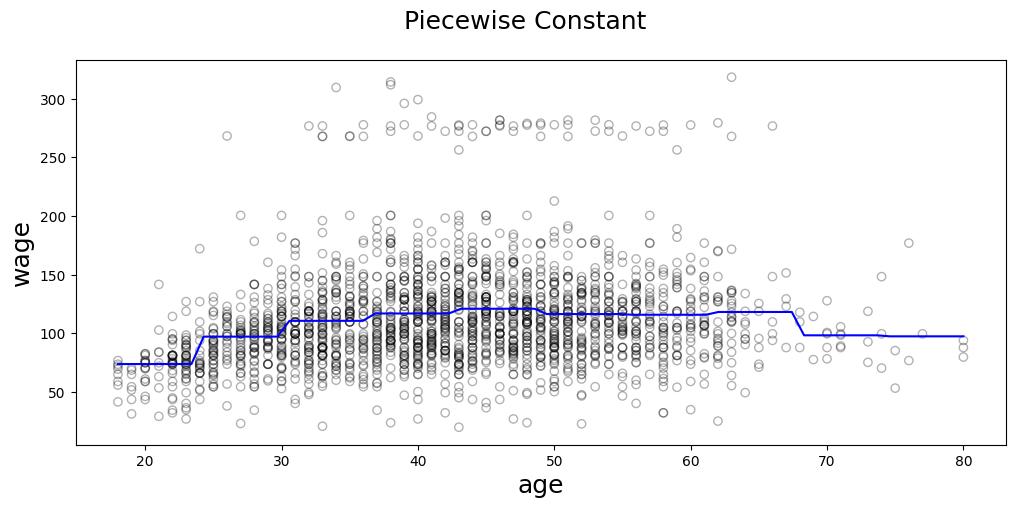

In [ ]:
# Visualisation
fig, (ax1) = plt.subplots(1,1, figsize=(12,5))
_= fig.suptitle('Piecewise Constant', fontsize=18)

xp = np.linspace(x_test.min(),x_test.max(),70)
bin_mapping = np.digitize(xp, bins)
X_valid_2 = pd.get_dummies(bin_mapping)
pred2 = model.predict(X_valid_2)

# Scatter plot with polynomial regression line
_= ax1.scatter(x_train, y_train, facecolor='None', edgecolor='k', alpha=0.3)
_= ax1.plot(xp, pred2, c='b')

_= ax1.set_xlabel('age',fontsize=18)
_= ax1.set_ylabel('wage',fontsize=18)
_ = plt.show()